# Data Visualization - Titanic

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print(f'matplotlib version : {mpl.__version__}')

matplotlib version : 3.8.2


## Data

### Find data path

In [2]:
import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/test.csv
./data/train.csv
./data/gender_submission.csv


In [3]:
titanic = pd.read_csv('./data/train.csv')
titanic.shape

(891, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Missing Values

<Axes: >

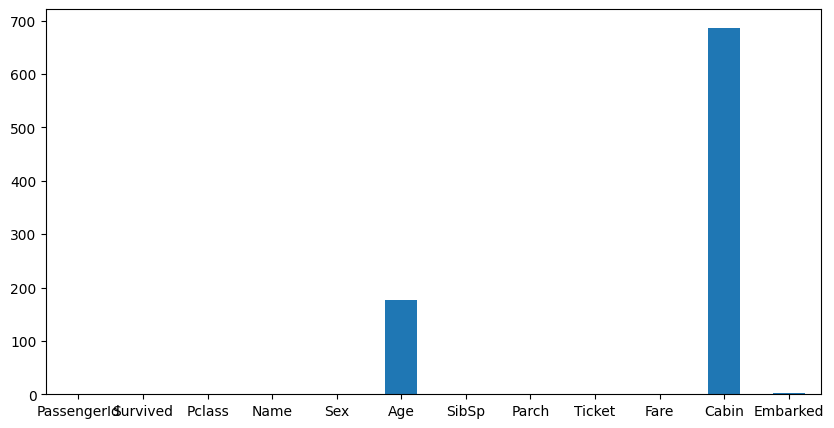

In [6]:
df_missing = titanic.isna().sum()
df_missing.plot.bar(figsize=(10,5), rot=0)

<Axes: >

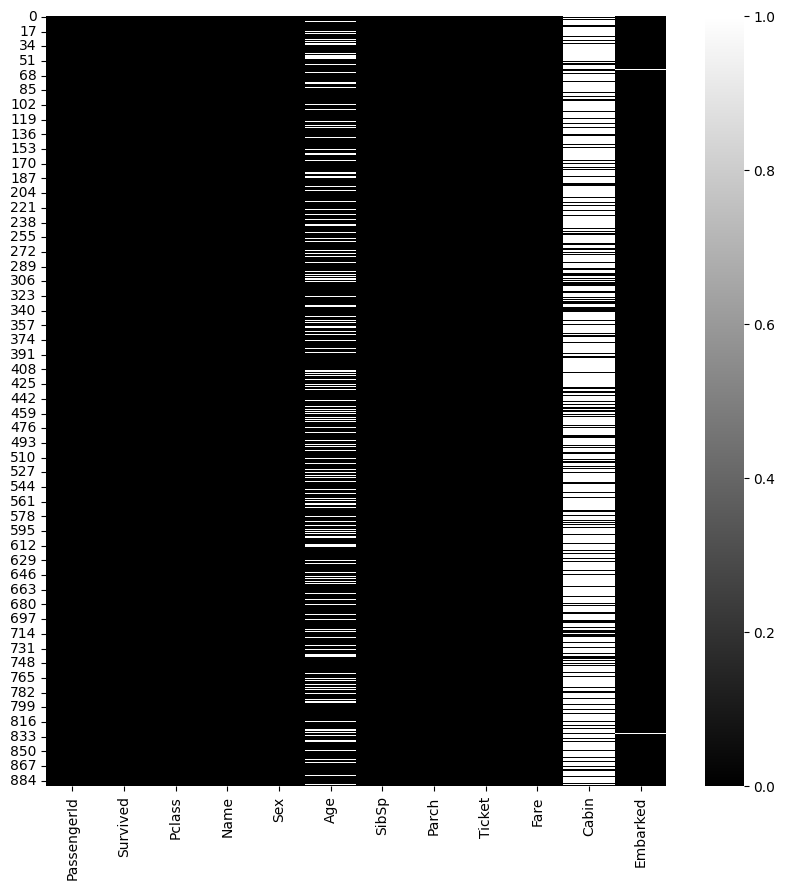

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(titanic.isna(), cmap = 'binary_r')

- Seaborn's heatmap -> cmap: binary (0: White, 1: Black)
- use binary_r to reverse color

### missingno

In [8]:
import missingno

print(f'missingno version : {missingno.__version__}')

missingno version : 0.5.2


- missing values with bar chart


<Axes: >

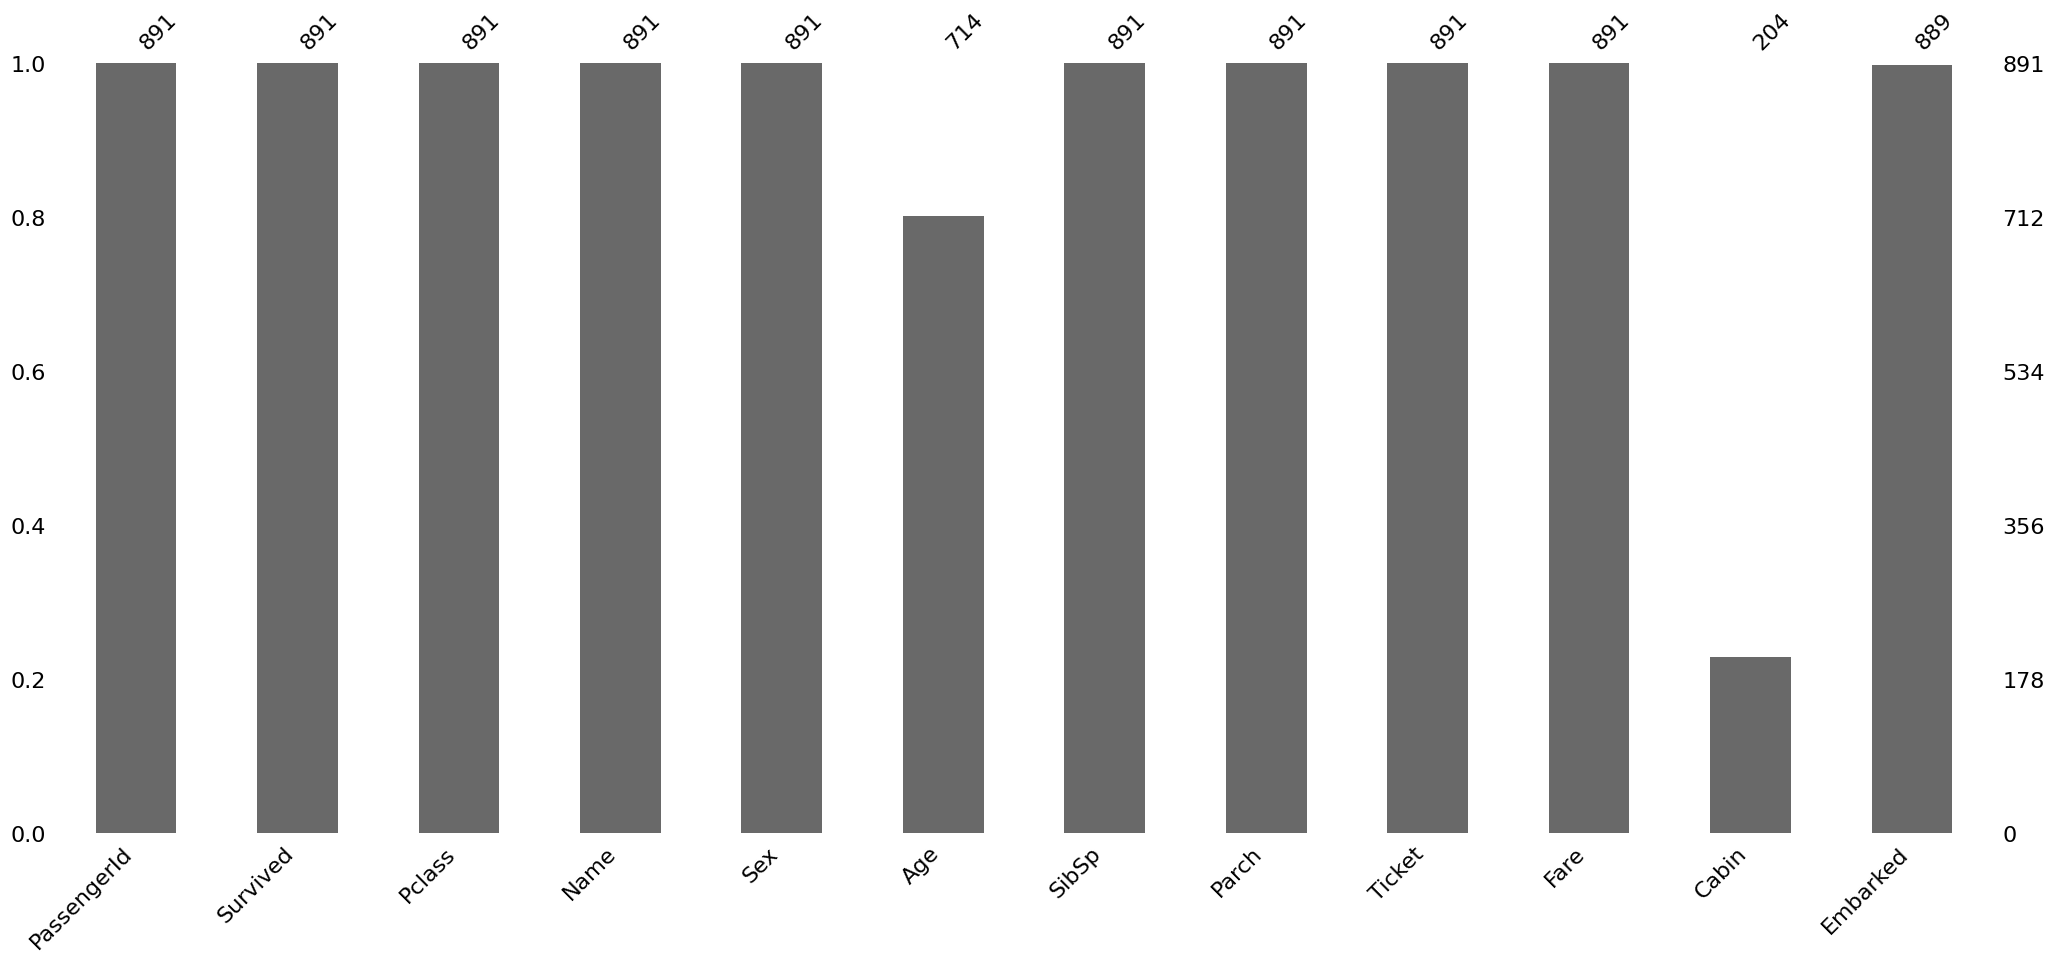

In [9]:
missingno.bar(titanic)

- missing values with matrix

<Axes: >

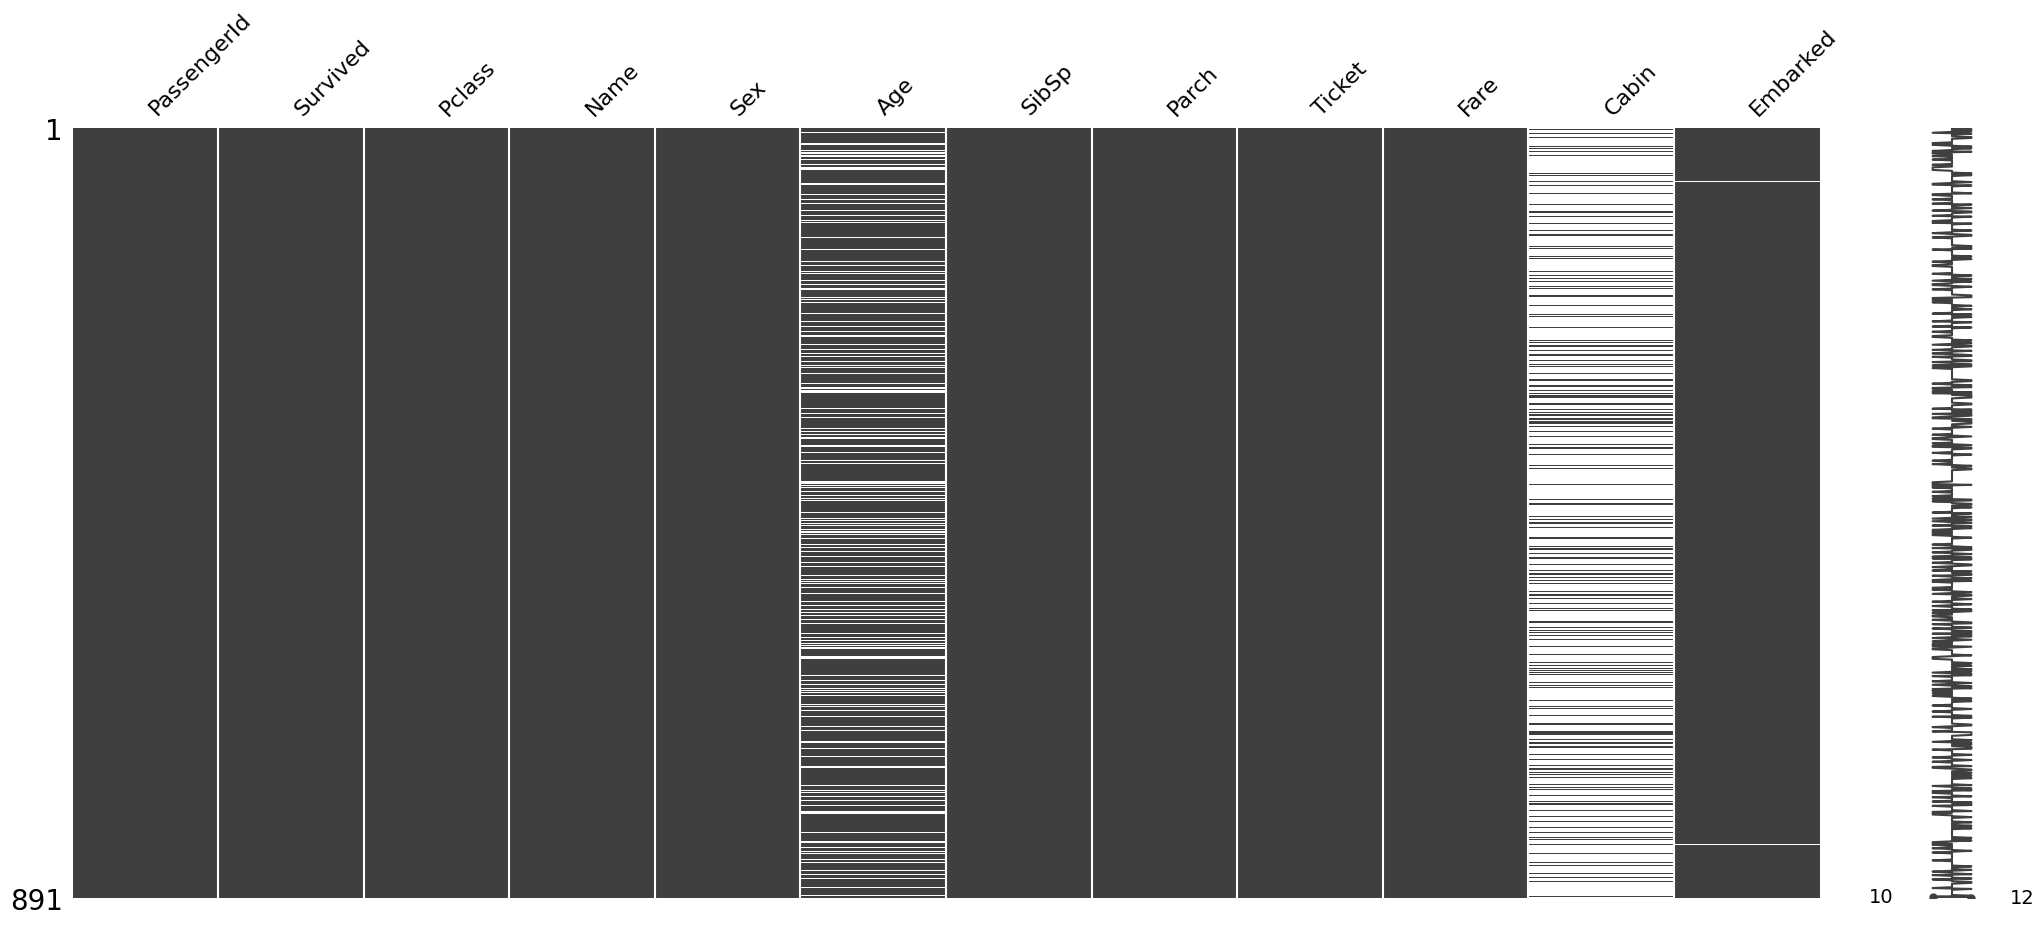

In [10]:
missingno.matrix(titanic)

### Seaborn


#### countplot

<Axes: xlabel='Pclass', ylabel='count'>

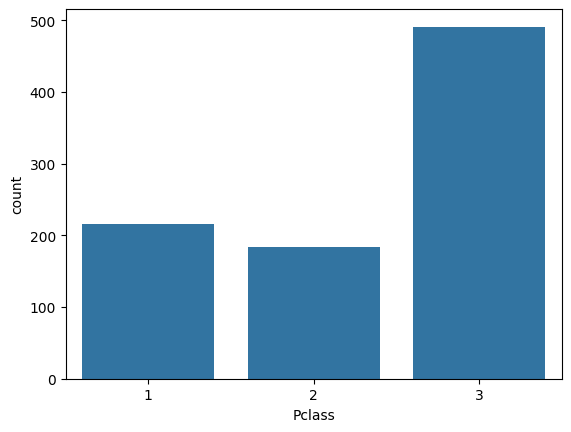

In [11]:
sns.countplot(x='Pclass', data=titanic)

<Axes: xlabel='count', ylabel='Pclass'>

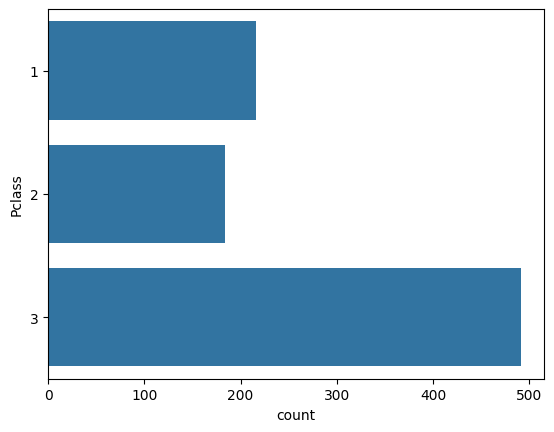

In [12]:
sns.countplot(y='Pclass', data=titanic)

<Axes: xlabel='Pclass', ylabel='count'>

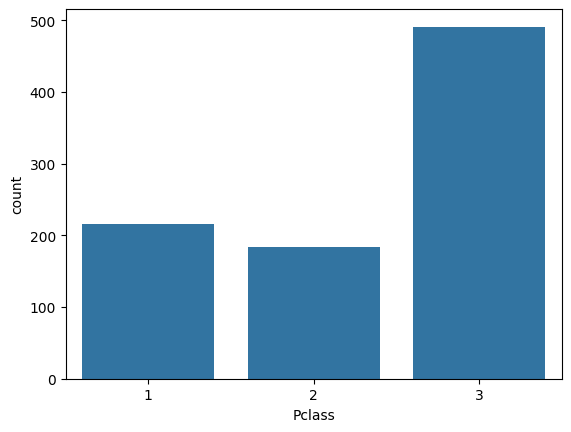

In [13]:
sns.countplot(x='Pclass', data=titanic,
              order=sorted(titanic['Pclass'].unique())
              )

- Hue means color, sperate data by colors based on given parameter. 

<Axes: xlabel='Pclass', ylabel='count'>

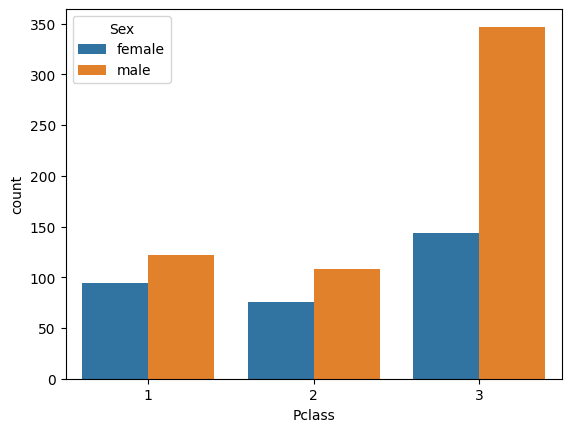

In [14]:
sns.countplot(x='Pclass', data=titanic,
              order=sorted(titanic['Pclass'].unique()),
              hue='Sex'
              )

## Data Analysis

<Axes: xlabel='Sex', ylabel='Survived'>

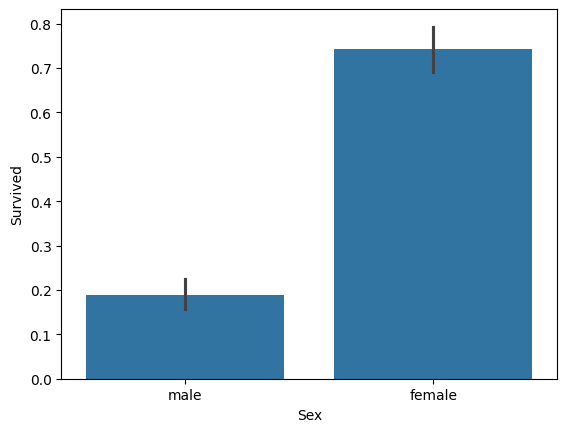

In [15]:
sns.barplot(x='Sex', y='Survived', data=titanic)

In [16]:
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [17]:
# Pclass is Categorical data
# change data type as string

titanic['Pclass'] = titanic['Pclass'].astype('str')
titanic['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: object

<Axes: xlabel='Pclass', ylabel='Survived'>

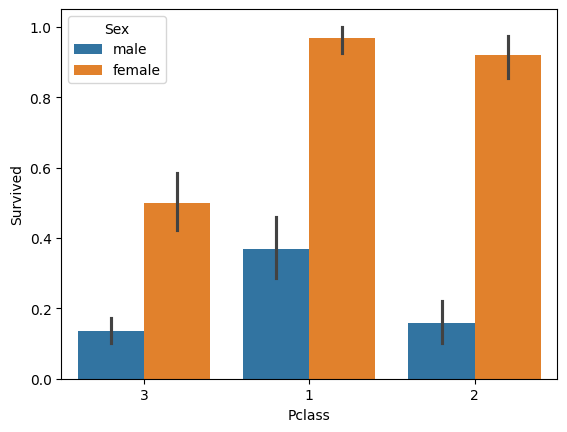

In [18]:
sns.barplot(x='Pclass', y='Survived', data=titanic,
            order=titanic['Pclass'],
            hue='Sex'
            )

<Axes: xlabel='Age', ylabel='Fare'>

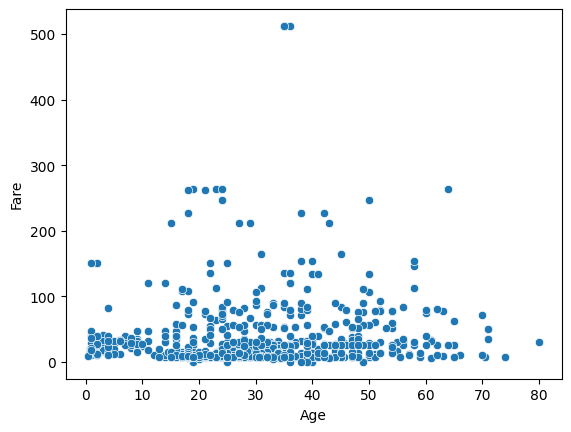

In [19]:
sns.scatterplot(x='Age', y='Fare', data=titanic)

<Axes: xlabel='Sex', ylabel='Fare'>

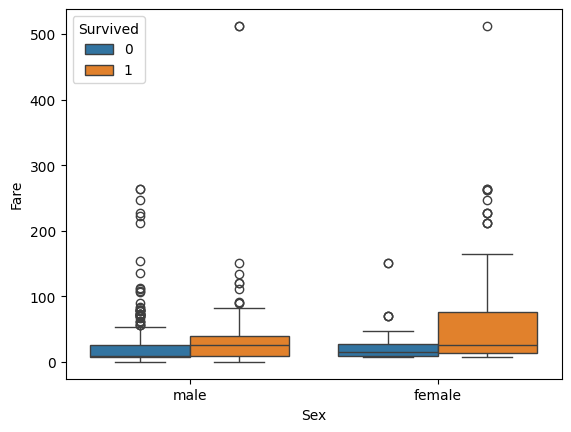

In [20]:
sns.boxplot(x='Sex', y='Fare', data=titanic, hue='Survived')

<Axes: xlabel='Pclass', ylabel='Age'>

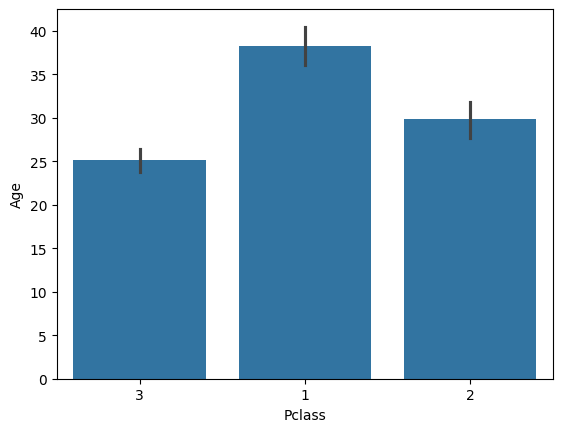

In [26]:
sns.barplot(x='Pclass', y='Age', data=titanic)

<Axes: xlabel='Survived', ylabel='Age'>

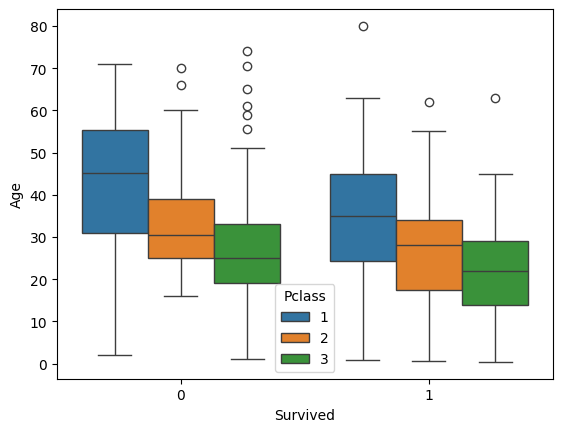

In [25]:
sns.boxplot(x='Survived', y='Age', data=titanic,
            hue='Pclass',
            hue_order=['1', '2', '3']
            )

- We can fill Missing values of Age with Age.mean, Age.mid, Age.min, Age.max...
- But as we find that age's mean value's are affected by Pclass.
- So, I'm gonna fill missing age values with each classes mean value.

In [35]:
class_age_mean = titanic['Age'].groupby(titanic['Pclass']).mean().round()
class_age_mean

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [43]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

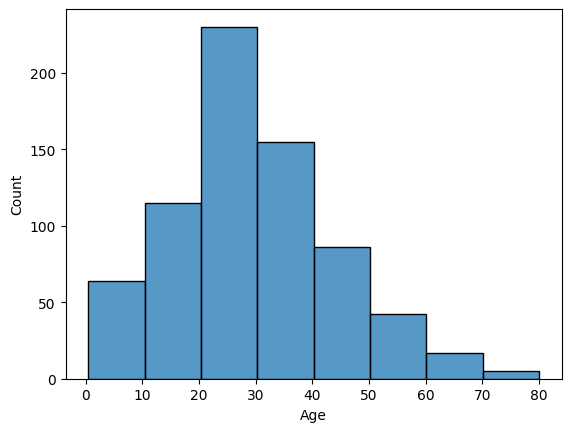

In [47]:
sns.histplot(x='Age', data=titanic, binwidth=10)

In [48]:
titanic['Age'] = titanic['Age'].fillna(titanic['Pclass'].map(class_age_mean))

<Axes: xlabel='Age', ylabel='Count'>

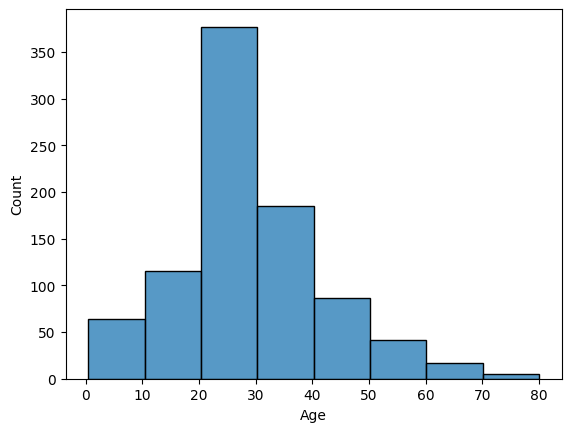

In [49]:
sns.histplot(x='Age', data=titanic, binwidth=10)